## **HW8 Ensemble Methods**

## **TODO: WRITE YOUR NAME HERE**


### **Introduction**


In this Homework, you are going explore two ensemble methods:

  - AdaBoost, and
  - Random Forests

And make a recommendation for a bank about which model they should use in production for better fraud detection.

### **Dataset**
  
The dataset for this assignment contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 237 frauds out of 142,167 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

It contains only numerical input variables which are the result of a [PCA transformation](https://en.wikipedia.org/wiki/Principal_component_analysis). Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount in Euros. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
# These are the libraries you will use for this assignment, you may not import anything else
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# This is the credit card data provided, we'll use sklearn
# methods to do cross validation to estimate error
df_cc = pd.read_csv('cc.csv')

## **Q1 Partition the data for cross validation**



Load the data, and split the data set into $X$ (the feature dataframe, `df_X`) and $y$ (the target series `s_y`). Define our partitions.  

We know this is a _super_ skewed data set, so we worry about our target class being underrepresented in a random k-fold selection. With this in mind, we use a [stratifed k-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), since it will preserve our class balance in our experiements. Use $k=3$, . Instantiate an instance of the `StratifiedKFold` class, and use the generator `split` to populate the test and train dictonaries:
   - `d_train_df_X` : key is the fold number, value is the attribute training dataframe at that fold
   - `d_test_df_X`  : key is the fold number, value is the attribute test dataframe at that fold
   - `d_train_s_y`  : key is the fold number, value is the target training series at that fold
   - `d_train_s_y`  : key is the fold number, value is the target test series at that fold

In [ ]:
df_X = df_cc.drop(columns=['Class'])
s_y = df_cc['Class']
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=23)


d_train_df_X = dict()
d_test_df_X = dict()
d_train_s_y = dict()
d_test_s_y = dict()
k = 1
for train_index, test_index in skf.split(df_X, s_y):
    d_train_df_X[k] = df_X.iloc[train_index]
    d_test_df_X[k] = df_X.iloc[test_index]
    d_train_s_y[k] = s_y.iloc[train_index]
    d_test_s_y[k] = s_y.iloc[test_index]

    k = k+1
for key in d_test_s_y.keys():
    print(d_test_s_y[key].value_counts())

## **Q2 Implementing AdaBoost Classifier**

As we learned in class, AdaBoost is a boosting ensemble method that starts with a weak classifier and iteratively adds to it by focusing on the misclassified instances. In many AdaBoost implementations, "Decision Stumps" (decision trees with a single split) are used as the base classifier.

While AdaBoost can work with various base classifiers, the default in `Scikit-learn`'s implementation is `DecisionTreeClassifier(max_depth=1)`, which is essentially a decision stump.

In this question, you will implement a function called `train_and_plot_adaboost()` that will do the following:

* Model training and prediction: Instantiate the AdaBoost classifier with the specified parameters: `AdaBoostClassifier(n_estimators=25, random_state=23)`

* `fit` to train the model.For predictions, you can use `predict` method for class predictions or `predict_proba` method to get the probability of being in class 0 or class 1. You will do cross-validation by loop over the 𝑘 folds using the dictionaries from the first problem. For each fold, calculate the following metrics:
    * Accuracy
    * True Positive Rate (TPR)
    * Positive Predictive Value (PPV)
    * False Positive Rate (FPR)
    * ROC Curve Plotting:

* Plot the ROC curve for each fold. You may use the roc_curve, RocCurveDisplay, from Scikit-learn. There is a great example in the documentation on plotting ROC curves in cross validation that is helpful.


* After looping through all the folds, save the predictions from the 3rd fold into a variable named `y_hat_ab`. This is the variable your function will return.


AdaBoost focuses on instances that were misclassified in previous iterations, which can lead to improved performance. Depending on the data size and the number of estimators, AdaBoost can take some time to run. Please be patient and allow it a few minutes if needed.


Working on 1
Working on 2
Working on 3
The min, mean, and max TPR are: 0.62, 0.65, and 0.71
The min, mean, and max PPV are: 0.75, 0.79, and 0.82
The min, mean, and max ACC are: 1.00, 1.00, and 1.00


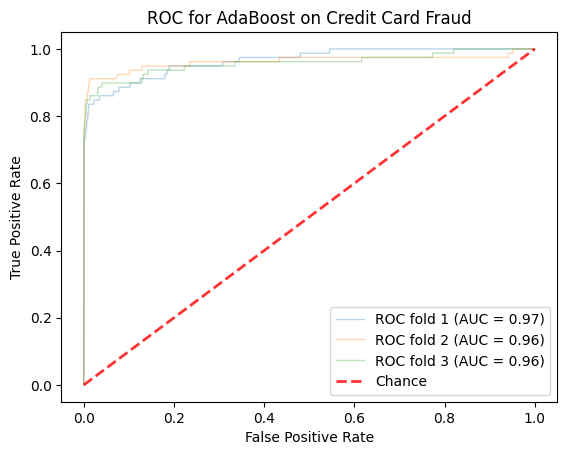

In [14]:
def train_and_plot_adaboost():
  '''
  Trains an AdaBoost classifier on the provided training data and plots the ROC curve
  for each fold in the cross-validation process.

  The function uses AdaBoost with decision stumps as weak learners. For each fold in the
  cross-validation, the function computes accuracy, TPR, PPV, and FPR, and plots the
  corresponding ROC curve. The ROC curve is generated using the raw decision scores
  from the AdaBoost classifier.

  Parameters:
  None. The function relies on globally defined datasets and split indices.

  Returns:
  y_hat : numpy array
      Predictions for the instances in the test set for the 3rd fold.

  Note:
  This function assumes that certain variables like training and test sets are
  defined in the global namespace.
  '''
  k = 3
  acc_ab = np.zeros(k)
  tpr_ab = np.zeros(k)
  ppv_ab = np.zeros(k)
  fpr_ab = np.zeros(k)

  fold_count = 0
  fig, ax = plt.subplots()

  for key in d_train_df_X.keys():
      print("Working on {}".format(key))

      # Train AdaBoost classifier
      clf = AdaBoostClassifier(n_estimators=25, random_state=23)
      clf.fit(d_train_df_X[key], d_train_s_y[key])

      # Predict the decision function scores
      y_scores = clf.decision_function(d_test_df_X[key])

      # Compute the ROC values
      fpr, tpr, _ = roc_curve(d_test_s_y[key], y_scores)

      # Compute the AUC (Area Under the Curve)
      roc_auc = auc(fpr, tpr)

      # Plot the ROC curve using RocCurveDisplay
      viz = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='AdaBoost')
      viz.plot(ax=ax, label='ROC fold {} (AUC = {:.2f})'.format(key, roc_auc), alpha=0.3, lw=1)

      y_hat = clf.predict(d_test_df_X[key])

      # Accuracy
      acc_ab[fold_count] = (y_hat == d_test_s_y[key]).sum() / len(d_test_s_y[key])

      true_indx = d_test_s_y[key] == 1
      false_indx = d_test_s_y[key] == 0

      # True positive rate
      tpr_ab[fold_count] = (y_hat[true_indx] == d_test_s_y[key][true_indx]).sum() / len(d_test_s_y[key][true_indx])

      # False positive rate
      fpr_ab[fold_count] = (y_hat[false_indx] != d_test_s_y[key][false_indx]).sum() / len(d_test_s_y[key][false_indx])

      # Positive Predictive Value
      predicted_pos_indx = y_hat == 1
      ppv_ab[fold_count] = (y_hat[true_indx] == d_test_s_y[key][true_indx]).sum() / len(y_hat[predicted_pos_indx])

      fold_count += 1
  print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_ab.min(), tpr_ab.mean(), tpr_ab.max()))
  print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_ab.min(), ppv_ab.mean(), ppv_ab.max()))
  print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_ab.min(), acc_ab.mean(), acc_ab.max()))

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
  ax.set_title('ROC for AdaBoost on Credit Card Fraud')
  ax.legend(loc="lower right")
  plt.show()

  return y_hat


y_hat_ab = train_and_plot_adaboost()


### **Q3 Implementing The Random Forest Classifier and Testing Its Performance**

Random Forest is an ensemble method that constructs a multitude of decision trees during training. For predictions, the mode of the classes (classification) of individual trees is used. The trees are built completely with no pruning. Hence, every leaf in the tree will be pure, but individual trees might be overfitted to the training set.

In this question, you will implement a function called `train_and_plot_randomforest()` where you will implement the following:

* While building the decision trees, at every internal node, randomly select 𝑝 attributes. Identify the best split that minimizes impurity among these 𝑝 attributes. The parameter 𝑝 corresponds to the `max_features` parameter in the `Scikit-learn`'s Random Forest Classifier.

**Model Training**
* Instantiate the Random Forest classifier with the specified parameters:
`RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=23)`. `fit` to train the model. For predictions, you can use `predict` method for class predictions. `predict_proba` method to get the probability of being in class 0 or class 1. These probabilities are used when creating ROC curves.

**Cross Validation**

* Loop over the 𝑘 folds using the dictionaries from the first problem.
For each fold, calculate the following metrics:
* Accuracy
* True Positive Rate (TPR)
* Positive Predictive Value (PPV)
* False Positive Rate (FPR)

**ROC Curve Plotting**

* Using the probabilities obtained from `predict_proba`, compute the ROC values.
* Plot the ROC curve for each fold. You can utilize the `RocCurveDisplay` from `Scikit-learn`.
* Refer to the Scikit-learn documentation for an example on plotting ROC curves in cross-validation.

**Saving Predictions**

* After looping through all the folds, save the predictions from the 3rd fold into a variable named `y_hat_rf`. This is what your function will return.



Working on 1
Working on 2
Working on 3


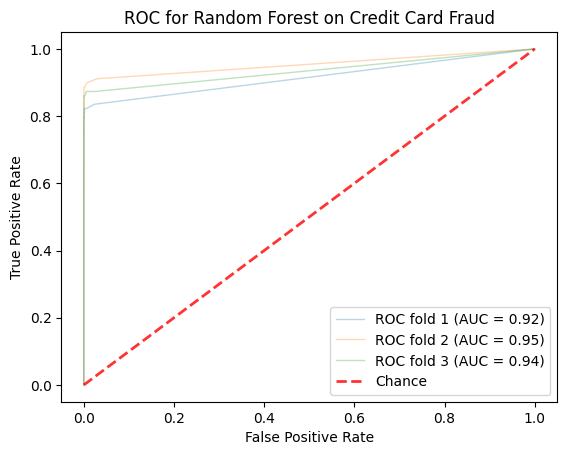

In [10]:
def train_and_plot_randomforest():
    '''
    Trains a Random Forest classifier on the provided training data and plots the ROC curve
    for each fold in the cross-validation process.

    The function uses a Random Forest with specified hyperparameters. For each fold in the
    cross-validation, the function computes accuracy, TPR, PPV, and FPR, and plots the
    corresponding ROC curve. The ROC curve is generated using the class probabilities
    for the positive class from the Random Forest classifier.

    Parameters:
    None. The function relies on globally defined datasets and split indices.

    Returns:
    y_hat : numpy array
        Predictions for the instances in the test set for the 3rd fold.

    Note:
    This function assumes that certain variables like training and test sets are
    defined in the global namespace.
    '''
    k = 3
    acc_rf = np.zeros(k)
    tpr_rf = np.zeros(k)
    ppv_rf = np.zeros(k)
    fpr_rf = np.zeros(k)

    fold_count = 0
    fig, ax = plt.subplots()

    for key in d_train_df_X.keys():
        print("Working on {}".format(key))

        # Train RandomForest classifier
        clf = RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=23)
        clf.fit(d_train_df_X[key], d_train_s_y[key])

        # Get the probability scores for the positive class
        y_scores = clf.predict_proba(d_test_df_X[key])[:, 1]

        # Compute the ROC values
        fpr, tpr, _ = roc_curve(d_test_s_y[key], y_scores)

        # Compute the AUC (Area Under the Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve using RocCurveDisplay
        viz = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
        viz.plot(ax=ax, label='ROC fold {} (AUC = {:.2f})'.format(key, roc_auc), alpha=0.3, lw=1)

        y_hat = clf.predict(d_test_df_X[key])

        # Accuracy
        acc_rf[fold_count] = (y_hat == d_test_s_y[key]).sum() / len(d_test_s_y[key])

        true_indx = d_test_s_y[key] == 1
        false_indx = d_test_s_y[key] == 0

        # True positive rate
        tpr_rf[fold_count] = (y_hat[true_indx] == d_test_s_y[key][true_indx]).sum() / len(d_test_s_y[key][true_indx])

        # False positive rate
        fpr_rf[fold_count] = (y_hat[false_indx] != d_test_s_y[key][false_indx]).sum() / len(d_test_s_y[key][false_indx])

        # Positive Predictive Value
        predicted_pos_indx = y_hat == 1
        ppv_rf[fold_count] = (y_hat[true_indx] == d_test_s_y[key][true_indx]).sum() / (len(y_hat[predicted_pos_indx]) + 1e-10)  # added epsilon to avoid division by zero

        fold_count += 1

    print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_rf.min(), tpr_rf.mean(), tpr_rf.max()))
    print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_rf.min(), ppv_rf.mean(), ppv_rf.max()))
    print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_rf.min(), acc_rf.mean(), acc_rf.max()))

    #plot the ROC curve
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    ax.set_title('ROC for Random Forest on Credit Card Fraud')
    ax.legend(loc="lower right")
    plt.show()

    return y_hat


y_hat_rf = train_and_plot_randomforest()

### **Q4 Calculate the Cost of Fraud**

In the above problems, we saved the predictions of the 3rd fold into the variables `y_hat_ab` and `y_hat_rf` for the AdaBoost and RandomForest models respectively.

Now, the Bank wants you to tell them how much money they are going to save if they deploy either of these fraud algorithms to the real-time payment processing system.  Assume that there is not a currently deployed fraud detection algorithm.  

For every fraudulent transaction that is not predicted as fraudulent the bank looses twice that much money.  So, a fradulent charge for €10 is undectected, it costs the bank €20.  Also, if a charge is predicted as fradulent, but wasn't, it costs the bank a flat fee of €3 in customer service support to communicate with the customer, and mark the possible fraud as a normal transaction.

Using the 3rd fold test sample, calculate how much money the Bank will save with each algorithm, and make a recommendation of which algorithm to deploy to production. All amounts are given in Euros.

In [15]:
# First, calculate the current cost to the bank with no fraud decection
fold_3_amount = d_test_df_X[3]['Amount']
current_cost = fold_3_amount[ d_test_s_y[3] == 1].sum()*2.0
print("The current cost to the bank is €{:.2f}".format(current_cost))

The current cost to the bank is €22484.74


In [16]:
cost_ab_undetected_fraud = fold_3_amount[(d_test_s_y[3] == 1) & (y_hat_ab == 0)].sum()*2.0
cost_ab_false_fraud = ((d_test_s_y[3] == 0) & (y_hat_ab == 1)).sum()*3.0
print("The bank will save €{:.2f} by deploying the AdaBoost algorithm".format(current_cost-cost_ab_undetected_fraud-cost_ab_false_fraud))

The bank will save €13946.42 by deploying the AdaBoost algorithm


In [17]:
cost_rf_undetected_fraud = fold_3_amount[(d_test_s_y[3] == 1) & (y_hat_rf == 0)].sum()*2.0
cost_rf_false_fraud = ((d_test_s_y[3] == 0) & (y_hat_rf == 1)).sum()*3.0
print("The bank will save €{:.2f} by deploying the Random Forest algorithm".format(current_cost-cost_rf_undetected_fraud-cost_rf_false_fraud))

The bank will save €18121.36 by deploying the Random Forest algorithm


### **TODO: Your Recommendation** Which model the bank should deploy in production?